# Google Play Store

## Table of Contents

1. Importing packages and data
2. Data Cleaning Phase
- Size  
- Last Updated  
- Installs  
- Current_ver and Android_ver  
- Rating, Reviews and Price To Numeric  
- Type  

### 1. Importing Packages and Data

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('googleplaystore.csv', dtype='str')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10841 non-null  object
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10840 non-null  object
 9   Genres          10841 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10838 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


In [50]:
df.shape

(10841, 13)

### 2. Data Cleaning Phase

In [51]:
#Clean columns name
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')


In [60]:
#clean values
def clean_vals(df):
    for col in df.columns:
        df[col] = df[col].str.strip().str.upper().str.replace('\t|\n', '', regex=True)

clean_vals(df)

In [62]:
#check
df.head(3)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19M,"10,000+",FREE,0,EVERYONE,ART & DESIGN,"JANUARY 7, 2018",1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14M,"500,000+",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,"JANUARY 15, 2018",2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"AUGUST 1, 2018",1.2.4,4.0.3 AND UP


### Size

We need to see what letter there are in thhe size column so that we can normalize the data.

In [63]:
print(df['size'].str.replace('\d+', '').unique())

['M' '.M' 'VARIES WITH DEVICE' 'K' '.K' ',+']


we can see that we have our size data in the form of megabytes, kilobytes and unknown.

In [67]:
df.loc[df['size'].str.contains('M')].head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19M,"10,000+",FREE,0,EVERYONE,ART & DESIGN,"JANUARY 7, 2018",1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14M,"500,000+",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,"JANUARY 15, 2018",2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"AUGUST 1, 2018",1.2.4,4.0.3 AND UP
3,SKETCH - DRAW & PAINT,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",FREE,0,TEEN,ART & DESIGN,"JUNE 8, 2018",VARIES WITH DEVICE,4.2 AND UP
4,PIXEL DRAW - NUMBER ART COLORING BOOK,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",FREE,0,EVERYONE,ART & DESIGN;CREATIVITY,"JUNE 20, 2018",1.1,4.4 AND UP


In [68]:
#Convert MB to KB
df.loc[df['size'].str.contains('M'), 'size'] = df.loc[df['size'].str.contains('M'), 'size'].str.rstrip('M').astype(float) * 1024

In [81]:
df.head(3)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",FREE,0,EVERYONE,ART & DESIGN,"JANUARY 7, 2018",1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,"JANUARY 15, 2018",2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"AUGUST 1, 2018",1.2.4,4.0.3 AND UP


In [79]:
df.loc[df['size'].astype(str).str.contains('K'), 'size'] = df.loc[df['size'].astype(str).str.contains('K'), 'size'].str.replace('K', '')
#There are no more values contains 'K'
df.loc[df['size'].astype(str).str.contains('K'), 'size']

Series([], Name: size, dtype: object)

In [82]:
#Adding clarify size column
df.rename(columns = {'size': 'size(kb)'}, inplace=True)

In [84]:
#check
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size(kb)', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

We know that 'varies with device means unkown or NaN. So let replace those values.

In [85]:
df['size(kb)'].replace('VARIES WITH DEVICE', np.nan, inplace=True)

In [89]:
df['size(kb)'].isnull().sum()

1695

There are 1695 rows that have NaN values

In [91]:
#Remove '+' in size(kb) column
df['size(kb)'] = df['size(kb)'].astype(str).str.replace('+', '', regex=False)

In [95]:
#removing commas
df['size(kb)'] = df['size(kb)'].str.replace(',', '')

In [96]:
#Convert size columns to numeric
df['size(kb)'] = pd.to_numeric(df['size(kb)'], errors='coerce')

__NaN values in size column__  
To deal with these missing values, we can fill them the mean value, groupby category.

In [97]:
df['size(kb)'] = df['size(kb)'].astype(float).fillna(df.groupby('category')['size(kb)'].transform('mean'))

In [98]:
#check
df.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size(kb)             0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

### Last Updated

For this  analysis, i only want the year so let remove everything before the comma in the last_updated.

In [100]:
df['last_updated'].unique()

array(['JANUARY 7, 2018', 'JANUARY 15, 2018', 'AUGUST 1, 2018', ...,
       'JANUARY 20, 2014', 'FEBRUARY 16, 2014', 'MARCH 23, 2014'],
      dtype=object)

Remove this rows from the dataframe

In [108]:
cond= df.loc[df['last_updated'] == '1.0.19'].index
df.drop(cond, inplace=True)

In [109]:
df['last_updated'] = pd.to_datetime(df['last_updated']).dt.year

In [110]:
#check
df['last_updated']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: last_updated, Length: 10840, dtype: int64

### Installs

Remove non numeric digits and convert the datatype to numeric.

In [111]:
df['installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [112]:
def remove_plus(df, col):
    df[col] = df[col].astype(str).str.replace('+', '', regex=False)
remove_plus(df, 'installs')

In [113]:
df.head(3)

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19456.0,"10,000",FREE,0,EVERYONE,ART & DESIGN,2018,1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14336.0,"500,000",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,2018,2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000",FREE,0,EVERYONE,ART & DESIGN,2018,1.2.4,4.0.3 AND UP


In [115]:
def remove_commas(df, col):
    df[col] = df[col].str.replace(',', '')
remove_commas(df, 'installs')

In [116]:
df['installs'] = pd.to_numeric(df['installs'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10840 non-null  object 
 1   category        10840 non-null  object 
 2   rating          9366 non-null   object 
 3   reviews         10840 non-null  object 
 4   size(kb)        10840 non-null  float64
 5   installs        10840 non-null  int64  
 6   type            10839 non-null  object 
 7   price           10840 non-null  object 
 8   content_rating  10840 non-null  object 
 9   genres          10840 non-null  object 
 10  last_updated    10840 non-null  int64  
 11  current_ver     10832 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


### Curent_ver and Android_ver

We don't need these columns for this analysis so we will remove those.

In [119]:
df = df.drop(['current_ver', 'android_ver'], axis=1)

In [120]:
df.head()

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19456.0,10000,FREE,0,EVERYONE,ART & DESIGN,2018
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14336.0,500000,FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,2018
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,FREE,0,EVERYONE,ART & DESIGN,2018
3,SKETCH - DRAW & PAINT,ART_AND_DESIGN,4.5,215644,25600.0,50000000,FREE,0,TEEN,ART & DESIGN,2018
4,PIXEL DRAW - NUMBER ART COLORING BOOK,ART_AND_DESIGN,4.3,967,2867.2,100000,FREE,0,EVERYONE,ART & DESIGN;CREATIVITY,2018


### Rating, Reviews and Price to Numeric

Remove $ from price column

In [130]:
df['price'] = df['price'].replace('$', '')

Covert rating, price, reviews columns to numeric

In [131]:
def to_numeric(df, col):
    df[col] = pd.to_numeric(df[col])
to_numeric(df, 'rating')
to_numeric(df, 'price')
to_numeric(df, 'reviews')

Fill NaN values in price, rating columns by mean values of category

In [132]:
df['price'] = df['price'].astype(float).fillna(df.groupby('category')['price'].transform('mean'))

In [133]:
df['rating'] = df['rating'].astype(float).fillna(df.groupby('category')['rating'].transform('mean'))

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10840 non-null  object 
 1   category        10840 non-null  object 
 2   rating          10840 non-null  float64
 3   reviews         10840 non-null  int64  
 4   size(kb)        10840 non-null  float64
 5   installs        10840 non-null  int64  
 6   type            10839 non-null  object 
 7   price           10840 non-null  float64
 8   content_rating  10840 non-null  object 
 9   genres          10840 non-null  object 
 10  last_updated    10840 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1016.2+ KB


### Type

There are one null value> It seems nonsensical so we can droup this row.

In [137]:
df.loc[df['type'].isnull()]

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
9148,COMMAND & CONQUER: RIVALS,FAMILY,4.192272,0,28998.679803,0,NaN,0.0,EVERYONE 10+,STRATEGY,2018


In [138]:
df.dropna(subset=['type'], inplace=True)

__Let's do final check of the data__

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10839 non-null  object 
 1   category        10839 non-null  object 
 2   rating          10839 non-null  float64
 3   reviews         10839 non-null  int64  
 4   size(kb)        10839 non-null  float64
 5   installs        10839 non-null  int64  
 6   type            10839 non-null  object 
 7   price           10839 non-null  float64
 8   content_rating  10839 non-null  object 
 9   genres          10839 non-null  object 
 10  last_updated    10839 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1016.2+ KB


In [140]:
df.sample(5)

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
4673,VMATE,VIDEO_PLAYERS,4.200000,192677,17408.0,50000000,FREE,0.0,TEEN,VIDEO PLAYERS & EDITORS,2018
7278,AZULONES GETAFE CF FANS,SPORTS,4.223511,4,7987.2,100,FREE,0.0,TEEN,SPORTS,2017
550,CLOVER DATING APP,DATING,4.100000,11633,23552.0,500000,FREE,0.0,MATURE 17+,DATING,2018
1330,MEDITATE OM,HEALTH_AND_FITNESS,4.500000,19074,4300.8,1000000,FREE,0.0,EVERYONE,HEALTH & FITNESS,2018
343,MY TELE2,COMMUNICATION,4.300000,158679,9011.2,5000000,FREE,0.0,EVERYONE,COMMUNICATION,2018


## 3. EDA Phase

__How many of each category do we have?__

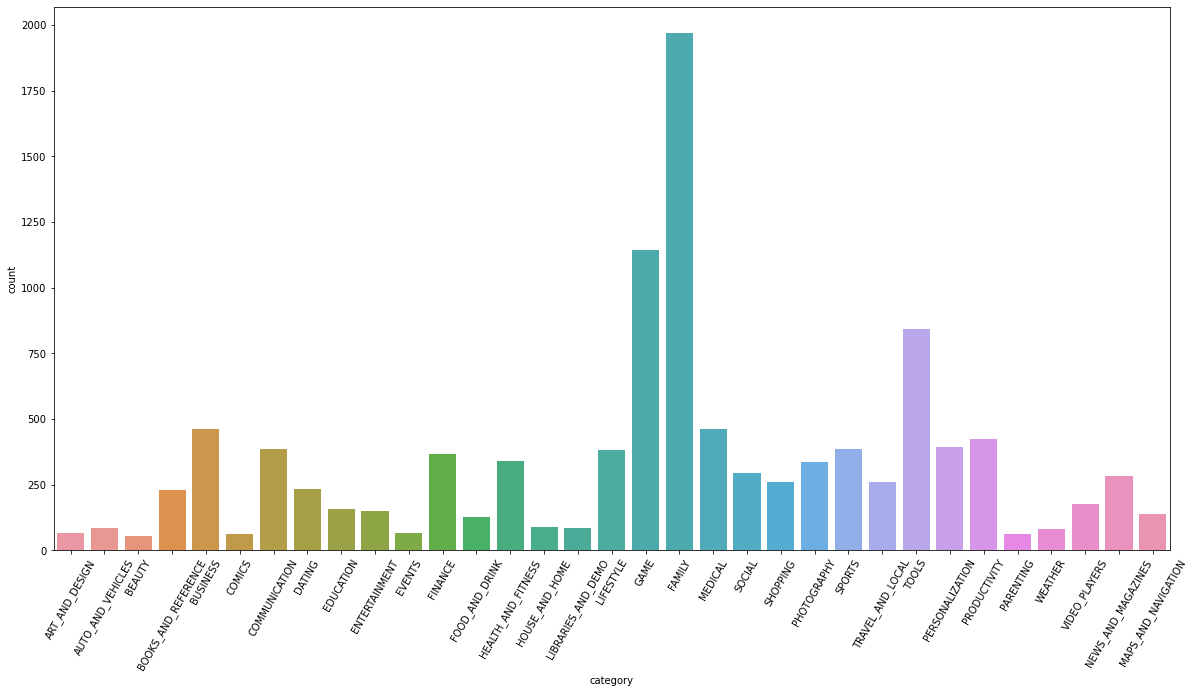

In [147]:
plt.figure(figsize=(20, 10))
fig = sns.countplot(df['category'])
plt.xticks(rotation=60)
plt.show()

__What the distributon of rating?__

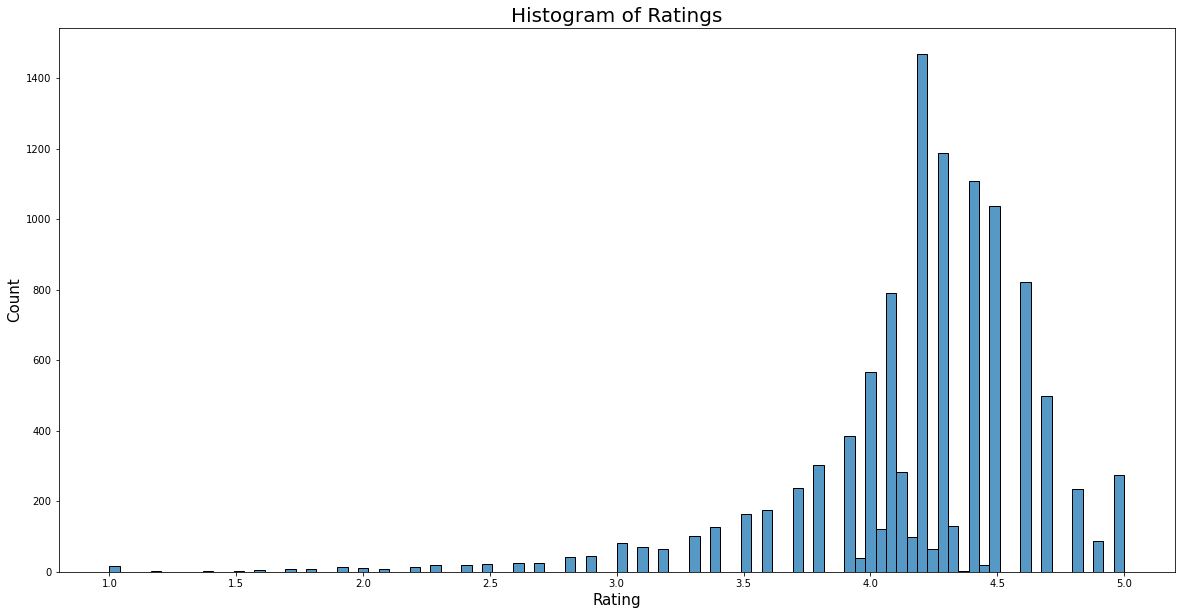

In [150]:
plt.figure(figsize=(20, 10))
g = sns.histplot(df['rating'])
g.set_title('Histogram of Ratings', fontsize=20)
g.set_xlabel('Rating', fontsize=15)
g.set_ylabel('Count', fontsize=15)
plt.show()